# Clean Data

In this notebook all datasets are transformed to a single format.

- $\log_{2}(TPM / 10 + 1)$ datasets:

    - GSE70630
    
    - GSE89567
    
    - GSE102130
    
    - GSE132172
    
    - GSE131928

- Raw Counts Datasets:

    - GSE84465
    
    - GSE103224
    

\* Note: if all columns (genes) adds up to 1000000, then the datasets is in TPM format and log transformation is applied.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [5]:
def log_transformation(X, d=10):
    return np.log2((X / d) + 1)    

# GSE70630

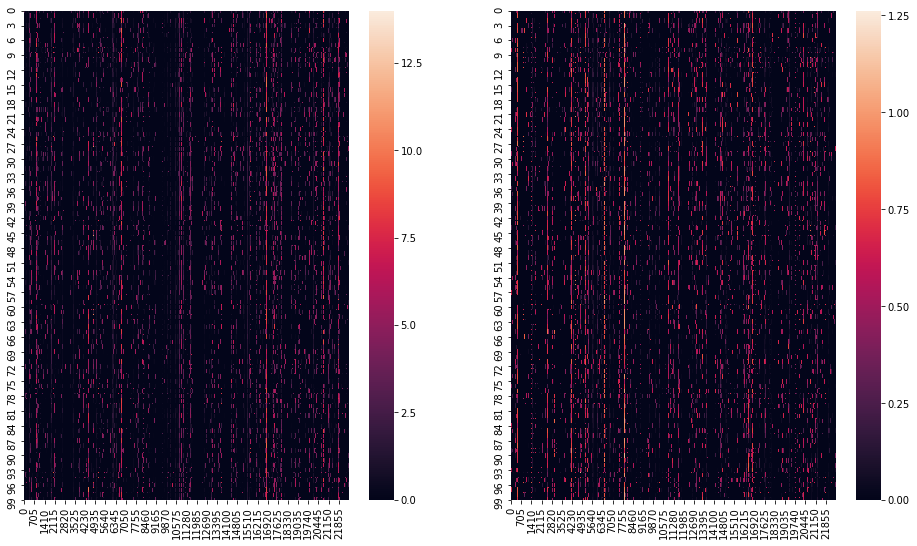

In [14]:
gse70630 = pd.read_csv('../raw-data/GSE70630/GSE70630_OG_processed_data_v2_cleaned.tsv', sep='\t', index_col=0)
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
sns.heatmap(gse70630.values.T[:100], ax=ax[0]) 
sns.heatmap(np.log2((gse70630.values.T[:100] / 10) + 1), ax=ax[1])

In [3]:
gse70630 = pd.read_csv('../raw-data/GSE70630/GSE70630_OG_processed_data_v2_cleaned.tsv', sep='\t', index_col=0)
display(gse70630.head())
tumor_ids = gse70630.columns.map(lambda s: s.split('_')[0])
# drop unidentified tumors
gse70630 = gse70630.loc[:, tumor_ids.map(lambda i: not i in ['93', '97'])].fillna(0)
gse70630.index = gse70630.index.map(lambda i: i.replace("'", ""))
gse70630_filtered = gse70630.loc[(gse70630 != 0).any(1)]
gse70630.to_csv('../data/GSE70630.txt', sep='\t')

,MGH36_P6_A12,MGH36_P6_H09,MGH53_P4_G04,MGH36_P10_G12,MGH53_P2_H12,MGH53_P4_D10,MGH53_P4_D01,MGH36_P6_B07,MGH36_P10_B12,MGH53_P2_G11,...,93_P10_H06,93_P8_B12,93_P8_D09,93_P9_D11,93_P10_G08,93_P8_H06,93_P9_C07,93_P8_A12,93_P8_C01,93_P9_F06
'A1BG',0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'A1BG-AS1',0.0000,0.000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'A1CF',0.0000,0.000,0.0000,0.0000,0.02148,0.0000,0.0000,0.0000,0.52707,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'A2M',5.7056,4.437,8.0276,5.6288,0.00000,3.3367,8.7811,8.3271,7.42620,9.04620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'A2M-AS1',0.0000,0.000,4.5347,0.0000,0.00000,0.0000,0.0000,3.3361,0.00000,0.63134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# GSE 89567

In [3]:
gse89567 = pd.read_csv('../raw-data/GSE89567/GSE89567_IDH_A_processed_data_cleaned.tsv', sep='\t', index_col=0)
gse89567.index = gse89567.index.map(lambda i: i.replace("'", ""))
gse89567.head()

,MGH42_P7_A01,MGH42_P7_A02,MGH42_P7_A03,MGH42_P7_A04,MGH42_P7_A05,MGH42_P7_A07,MGH42_P7_A09,MGH42_P7_A11,MGH42_P7_A12,MGH42_P7_B02,...,MGH107neg_P2_E06,MGH107pos_P2_B03,MGH107neg_P1_F03,MGH107neg_P1_G06,MGH107neg_P2_H03,MGH107neg_P2_C05,MGH107pos_P2_D07,MGH107neg_P1_E01,MGH107pos_P2_G09,MGH107neg_P1_D06
A1BG,1.1928,0.000000,0.00000,0.0000,0.0000,0.66903,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,2.4772,0.0000,0.0
A1BG-AS1,0.0000,0.000000,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.83996,0.0000,0.0000,0.0000,0.0
A1CF,0.0000,0.094912,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0
A2M,7.0439,7.609500,0.77062,7.6146,0.0000,0.00000,0.27501,8.1624,6.5655,6.9658,...,0.0,8.6046,0.0,0.0,0.0,0.00000,9.5281,0.0000,6.8999,0.0
A2M-AS1,0.0000,0.000000,0.00000,0.0000,2.0339,2.39420,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0


# GSE102130

In [3]:
gse102130 = pd.read_csv('../raw-data/GSE102130/GSE102130_K27Mproject_cleaned.tsv', sep='\t', index_col=0)
gse102130.head()

,MUV1-P04-B12,MUV1-P04-C08,MUV1-P04-D09,MUV1-P04-D10,MUV1-P04-E03,MUV1-P04-E07,MUV1-P04-E08,MUV1-P04-E10,MUV1-P04-E11,MUV1-P04-F05,...,Oligo-P22-G05,Oligo-P22-G07,Oligo-P22-G11,Oligo-P22-G12,Oligo-P22-H02,Oligo-P22-H03,Oligo-P22-H05,Oligo-P22-H06,Oligo-P22-H08,Oligo-P22-H09
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,132.26,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
A1CF,0.0,0.0,0.0,0.0,0.00,0.00,0.53,0.34,0.0,0.00,...,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
A2M,0.0,0.0,0.0,0.0,348.48,362.08,0.00,0.00,0.0,27.17,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
A2M-AS1,0.0,0.0,0.0,0.0,0.00,1.19,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1098.07,0.0


In [9]:
gse102130_log = log_transformation(gse102130)

In [35]:
cols = ['MUV1', 'MUV5', 'MUV10', 'BCH836', 'BCH869', 'BCH1126']
filtered = gse102130.loc[gse102130.index.map(lambda s: s.split('-')[0] in cols)].T
filtered = filtered.loc[(filtered > 0).any(1)]
filtered.to_csv('../data/GSE102130.txt', sep='\t')

# GSE57872

In [6]:
gse57872 = pd.read_csv('../raw-data/GSE57872/GSE57872_GBM_data_matrix.txt', sep='\t', index_col=0)
gse57872.head()

,MGH264_A01,MGH264_A02,MGH264_A03,MGH264_A04,MGH264_A05,MGH264_A06,MGH264_A07,MGH264_A08,MGH264_A10,MGH264_A11,...,MGH26FCS,MGH26Tumor,MGH28CSC,MGH28FCS,MGH28Tumor,MGH29Tumor,MGH30Tumor,MGH31CSC,MGH31FCS,MGH31Tumor
A2M,-3.801470,-3.801470,-3.801470,-3.801470,-3.801470,-1.987700,-3.801470,-3.801470,-3.801470,-3.801470,...,-6.484534,-3.038651,-3.409382,-3.984825,3.112043,4.161139,1.792081,4.694467,3.826620,2.180888
AAAS,-3.889900,-3.889900,-3.889900,-3.889900,3.742495,-3.889900,-3.889900,-3.889900,-3.889900,4.316243,...,-1.392566,-0.183522,0.844202,-0.872499,-0.050085,-0.019764,-0.124966,1.493167,1.468188,-1.114900
AAK1,-3.985616,-3.158708,1.733125,-1.665669,-2.166992,4.691156,2.656469,-1.914759,0.483560,1.828663,...,-0.570789,-0.080933,3.096310,0.273106,-0.307181,0.200401,-0.327583,-0.265878,0.887639,-1.929420
AAMP,2.651558,2.358992,-5.820241,3.514271,-5.820241,-4.006471,2.207608,2.417820,-5.820241,2.140173,...,-2.243000,-0.121189,-0.131112,-0.544799,-0.171306,0.866269,0.227523,0.991496,1.506706,1.015800
AARS,2.170748,-6.041792,-6.041792,-6.041792,2.094729,-3.449348,-6.041792,3.162904,-6.041792,-6.041792,...,-0.706095,-0.325803,0.075450,-1.467605,0.563490,-0.364656,-0.628892,-0.016801,0.103757,3.180410


In [5]:
def drop_columns(col_name):
    return not ('CSC' in col_name or 'FCS' in col_name or 'Tumor' in col_name)
filtered = gse57872.loc[:, gse57872.columns.map(drop_columns)]
filtered.to_csv('../data/GSE57872.txt', sep='\t')

# GSE132172

In [7]:
gse132172 = pd.read_csv('../raw-data/GSE132172/GSE132172_glio_chrom_instability_normalized_expression_matrix.tsv.gz',
                        sep='\t', index_col=0)
gse132172.head()

,GliNS2_SC_RNAseq_A02,GliNS2_SC_RNAseq_A03,GliNS2_SC_RNAseq_A04,GliNS2_SC_RNAseq_A05,GliNS2_SC_RNAseq_A06,GliNS2_SC_RNAseq_A07,GliNS2_SC_RNAseq_A08,GliNS2_SC_RNAseq_A10,GliNS2_SC_RNAseq_A11,GliNS2_SC_RNAseq_A12,...,CB660_SC_RNAseq_G08,CB660_SC_RNAseq_G09,CB660_SC_RNAseq_G10,CB660_SC_RNAseq_G11,CB660_SC_RNAseq_H01,CB660_SC_RNAseq_H02,CB660_SC_RNAseq_H04,CB660_SC_RNAseq_H05,CB660_SC_RNAseq_H11,CB660_SC_RNAseq_H12
TSPAN6,6.366337,7.748858,-0.000003,8.428118,8.659749,-0.000003,7.391020,7.537448,6.539594,8.177560,...,6.872613,7.265669,8.112834,8.093433,8.713304,7.861825,7.224985,8.987354,7.012397,-0.000003
TNMD,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003
DPM1,7.470113,6.535380,7.389797,7.781965,7.006131,7.629678,7.646774,8.242666,7.266463,7.853420,...,5.082440,5.281458,7.904470,6.346982,1.204417,7.651300,6.346360,7.537103,6.593959,5.988910
SCYL3,-0.000003,5.052909,5.037508,-0.000003,-0.000003,-0.000003,-0.000003,5.414151,4.202473,-0.000003,...,2.428743,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,6.239711,-0.000003
C1orf112,-0.000003,-0.000003,1.522612,-0.000003,-0.000003,-0.000003,4.996755,-0.000003,-0.000003,-0.000003,...,4.373585,-0.000003,1.428775,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003


In [8]:
gse132172.T.describe()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,CFH,FUCA2,GCLC,NFYA,STPG1,...,HIST1H3D,FRG1EP,CDC27P3,DUX4L37,GTF2IP12,HYMAI,LINC01505,SOGA3,EMG1,POLR2J4
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,6.699693,0.060713,6.928984,1.039410,0.898912,2.973232,5.471312,1.004094,2.629207,0.564669,...,0.273431,0.064912,0.012546,0.048479,0.602595,0.012768,0.225944,0.042622,1.502806,0.350779
std,2.561271,0.546994,1.289043,1.946817,1.943041,3.906879,2.294592,2.111390,3.005505,1.480823,...,0.875087,0.266753,0.102494,0.325724,1.653585,0.147833,0.600326,0.256576,1.143682,0.800862
min,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003
25%,6.417910,-0.000003,6.350860,-0.000003,-0.000003,-0.000003,4.829447,-0.000003,-0.000003,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003
50%,7.539839,-0.000003,7.101745,-0.000003,-0.000003,-0.000003,6.289959,-0.000003,-0.000003,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,1.796022,-0.000003
75%,8.203817,-0.000003,7.660901,0.795255,-0.000003,7.560046,7.111557,-0.000003,5.591425,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,-0.000003,2.338844,-0.000003
max,9.694236,5.964151,9.878905,6.796575,7.711807,10.126756,8.677395,9.140434,8.610125,6.870321,...,4.730672,1.426459,0.887710,3.293013,6.920933,1.711282,3.028960,2.040388,4.142965,3.435735


In [9]:
gse132172.shape

(21209, 134)

In [3]:
gse132172_cleaned = gse132172[(gse132172 > 0).any(1)]

cols = gse132172.columns.map(lambda s: s.split('_')[0])

for cell in ['GliNS2', 'CB660']:
    gse132172_cleaned.loc[:, cols == cell].to_csv('../data/GSE132172' + '_' + cell + '.txt',
                                                 sep='\t')

# GSE84465

In [10]:
gse84465 = pd.read_csv('../raw-data/GSE84465/GSE84465_GBM_All_data.tsv', sep='\t', index_col=0)
gse84465.head()

NameError: name 'gse84464' is not defined

In [7]:
gse84465_log = np.log2(gse84465 + 1)
gse84465_log.describe()

,1001000173.G8,1001000173.D4,1001000173.B4,1001000173.A2,1001000173.E2,1001000173.F6,1001000173.B12,1001000173.D6,1001000173.H1,1001000173.E4,...,1001000271.C2,1001000271.D1,1001000271.B1,1001000271.A3,1001000271.E1,1001000271.F1,1001000271.D4,1001000271.C1,1001000271.H7,1001000271.H2
count,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,...,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000
mean,0.497206,0.171805,1.380401,1.077991,0.595920,0.663114,1.464275,1.112941,1.033557,1.022095,...,0.714863,0.453109,0.845816,1.086607,0.821976,0.169224,0.462355,1.007030,0.041732,0.802357
std,1.739650,1.107931,2.602139,2.536788,1.956696,1.982153,2.703622,2.495377,2.321564,2.527507,...,2.037457,1.222986,2.154800,2.535015,2.135230,1.104280,1.612061,2.361803,0.276735,2.189962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.712483,16.174653,17.504253,18.438544,19.033071,18.861538,17.502622,18.511822,18.394848,18.059117,...,18.337382,15.578638,18.147091,18.860805,17.200381,17.770012,17.401263,18.413971,11.606405,18.577661


In [8]:
# falta identificar celulas
gse84465_log.iloc[:-5].to_csv('../data/GSE84465.txt', sep='\t')

# GSE103224

In [3]:
import os

os.chdir('../raw-data/GSE103224')
gse103224 = []

for file in os.listdir():
    if '.txt' in file:
        df = pd.read_csv(file, sep='\t', index_col=[0, 1], header=None)
        tumor_name = file.split('_')[1].split('.')[0]
        df.columns = df.columns.map(lambda col_name: tumor_name + '_' + str(col_name))
        print(df.shape)
        gse103224.append(df)
os.chdir('..')
os.chdir('..')

(60725, 5924)
(60725, 3097)
(60725, 3085)
(60725, 1377)
(60725, 3084)
(60725, 1261)
(60725, 2197)
(60725, 3768)


In [4]:
total_cells = 0
for df in gse103224:
    total_cells += df.shape[1]
print(total_cells)  

23793


In [5]:
gse103224_full = reduce(lambda left, right: left.merge(right, right_index=True, left_index=True, how='outer'), gse103224)
print(gse103224_full.shape)
gse103224_full.head()

(60725, 23793)


,,PJ025_2,PJ025_3,PJ025_4,PJ025_5,PJ025_6,PJ025_7,PJ025_8,PJ025_9,PJ025_10,PJ025_11,...,PJ035_3760,PJ035_3761,PJ035_3762,PJ035_3763,PJ035_3764,PJ035_3765,PJ035_3766,PJ035_3767,PJ035_3768,PJ035_3769
0,1,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,TSPAN6,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,TNMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,DPM1,2,1,4,0,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000457.13,SCYL3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000460.16,C1orf112,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
gse103224_full[(gse103224_full > 0).any(1)].to_csv('../data/GSE103224.txt', sep='\t', dtype=np.int32)

# GSE131928

In [3]:
gse131928_smartseq2 = pd.read_csv('../raw-data/GSE131928/GSM3828672_Smartseq2_GBM_IDHwt_processed_TPM.tsv.gz',
                                 sep='\t', index_col=0)

In [44]:
gse131928_smartseq2_filtered = gse131928_smartseq2[(gse131928_smartseq2 > 0).any(1)]
gse131928_smartseq2_filtered.to_csv('../data/GSE131928_SmartSeq2.txt', sep='\t')

In [5]:
gse131928_10x = pd.read_csv('../raw-data/GSE131928/GSM3828673_10X_GBM_IDHwt_processed_TPM.tsv.gz',
                                 sep='\t', index_col=0)

In [6]:
gse131928_10x_filtered = gse131928_10x[(gse131928_10x > 0).any(1)]
gse131928_10x_filtered.to_csv('../data/GSE131928_10x.txt', sep='\t')

In [43]:
((2 ** gse131928_smartseq2 - 1) * 10).sum()

MGH101-P1-A04    1000000.10
MGH101-P1-A05     999999.98
MGH101-P1-A07    1000000.10
MGH101-P1-A09     999999.73
MGH101-P1-A10     999999.77
                    ...    
MGH66-P08-H06     999999.65
MGH66-P08-H07     999999.76
MGH66-P08-H08     999999.87
MGH66-P08-H10    1000000.18
MGH66-P08-H11    1000000.27
Length: 7930, dtype: float64